In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('seattleWeather_1948-2017.csv')
# data.head()
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [3]:
# filters dataset for relevant columns
prcp_data = data[['DATE', 'PRCP']]
prcp_data.head()

,DATE,PRCP
0,1948-01-01,0.47
1,1948-01-02,0.59
2,1948-01-03,0.42
3,1948-01-04,0.31
4,1948-01-05,0.17


In [4]:
prcp_2000 = prcp_data.loc[data["DATE"].str.startswith('2000')]

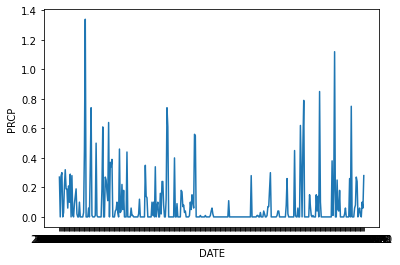

In [5]:
prcp = sns.lineplot(data=prcp_2000, sort=False, x='DATE', y='PRCP')

In [6]:
prcp_2000.sum()

DATE    2000-01-012000-01-022000-01-032000-01-042000-0...
PRCP                                                28.66
dtype: object

In [8]:
#sum of rain per year and the trend over time

prcp_per_year = prcp_data.groupby(prcp_data.DATE.str[:4])['PRCP'].sum()
prcp_year = prcp_per_year.reset_index()

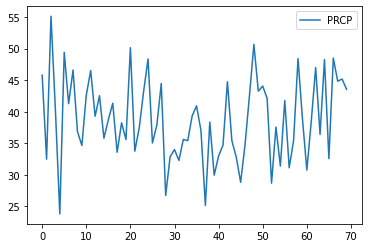

In [9]:
# total prcp per year
prcp_year.plot()

In [10]:
#the average prcp per day (year)
prcp_per_day = prcp_data.groupby(prcp_data.DATE.str[-5:])['PRCP'].sum()

In [11]:
prcp_per_day

DATE
01-01    11.66
01-02    16.42
01-03     9.95
01-04    14.46
01-05    14.73
         ...  
12-27    13.84
12-28     8.28
12-29    14.27
12-30    10.07
12-31     8.44
Name: PRCP, Length: 366, dtype: float64

In [12]:
prcp_per_day_avg = prcp_data.groupby(prcp_data.DATE.str[-5:])['PRCP'].mean()

In [13]:
prcp_per_day_avg

DATE
01-01    0.166571
01-02    0.234571
01-03    0.142143
01-04    0.206571
01-05    0.210429
           ...   
12-27    0.200580
12-28    0.120000
12-29    0.206812
12-30    0.145942
12-31    0.122319
Name: PRCP, Length: 366, dtype: float64

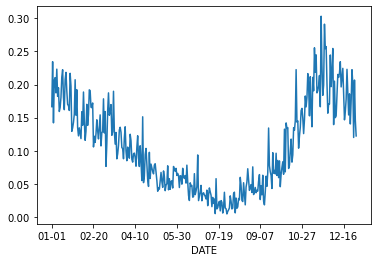

In [14]:
prcp_per_day_avg.plot()

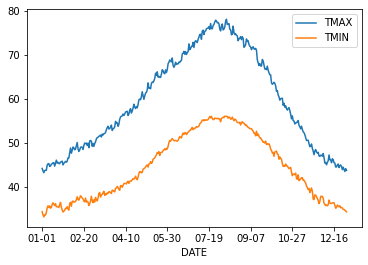

In [15]:
#the average prcp per day (year) high and low
temp_data = data[['DATE', 'TMAX', 'TMIN']]
temp_data
temp_avg_per_day = temp_data.groupby(temp_data.DATE.str[-5:])['TMAX','TMIN'].mean()

temp_avg_per_day.plot()

In [16]:
#subtract tmax and tmix
temp_avg_per_day['TDIFF'] = temp_avg_per_day['TMAX'] - temp_avg_per_day['TMIN']

,TMAX,TMIN,TDIFF
DATE,,,
01-01,44.271429,34.442857,9.828571
01-02,43.714286,33.714286,10.000000
01-03,43.300000,33.257143,10.042857
01-04,43.785714,33.742857,10.042857
01-05,43.842857,33.700000,10.142857
...,...,...,...
12-27,44.565217,34.971014,9.594203
12-28,44.086957,34.942029,9.144928
12-29,43.579710,34.768116,8.811594


In [20]:
temp_diff_per_day = temp_avg_per_day[['DATE', 'TDIFF']]


KeyError: "['DATE'] not in index"